In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score


In [2]:
df = pd.read_csv('data.csv')

In [3]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perime

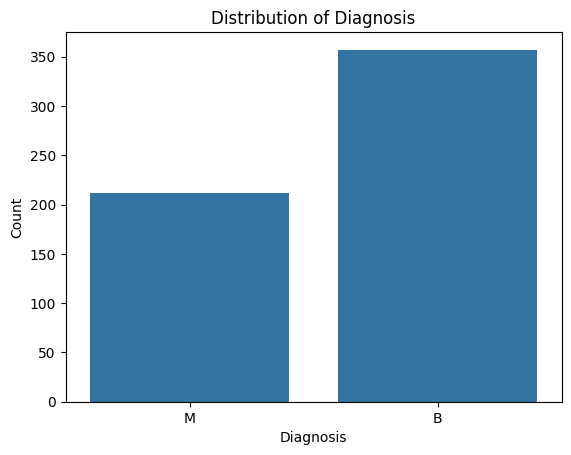

In [4]:
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


Missing Values per Column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

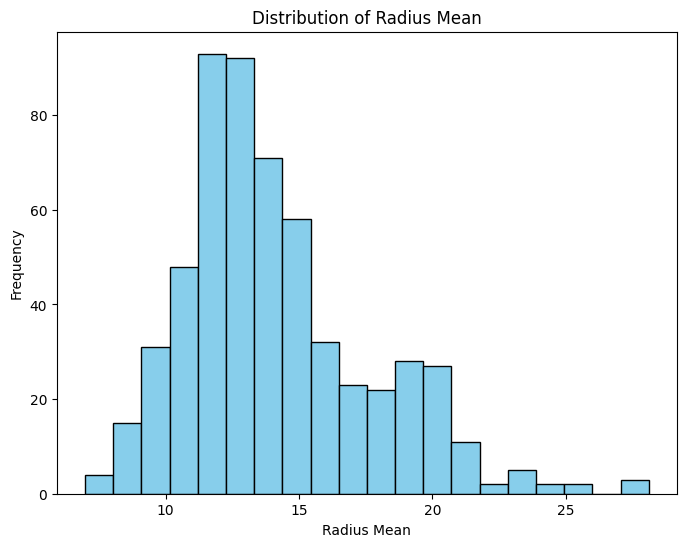

In [5]:
print("\nMissing Values per Column:")
print(df.isnull().sum())

plt.figure(figsize=(8, 6))
plt.hist(df['radius_mean'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()


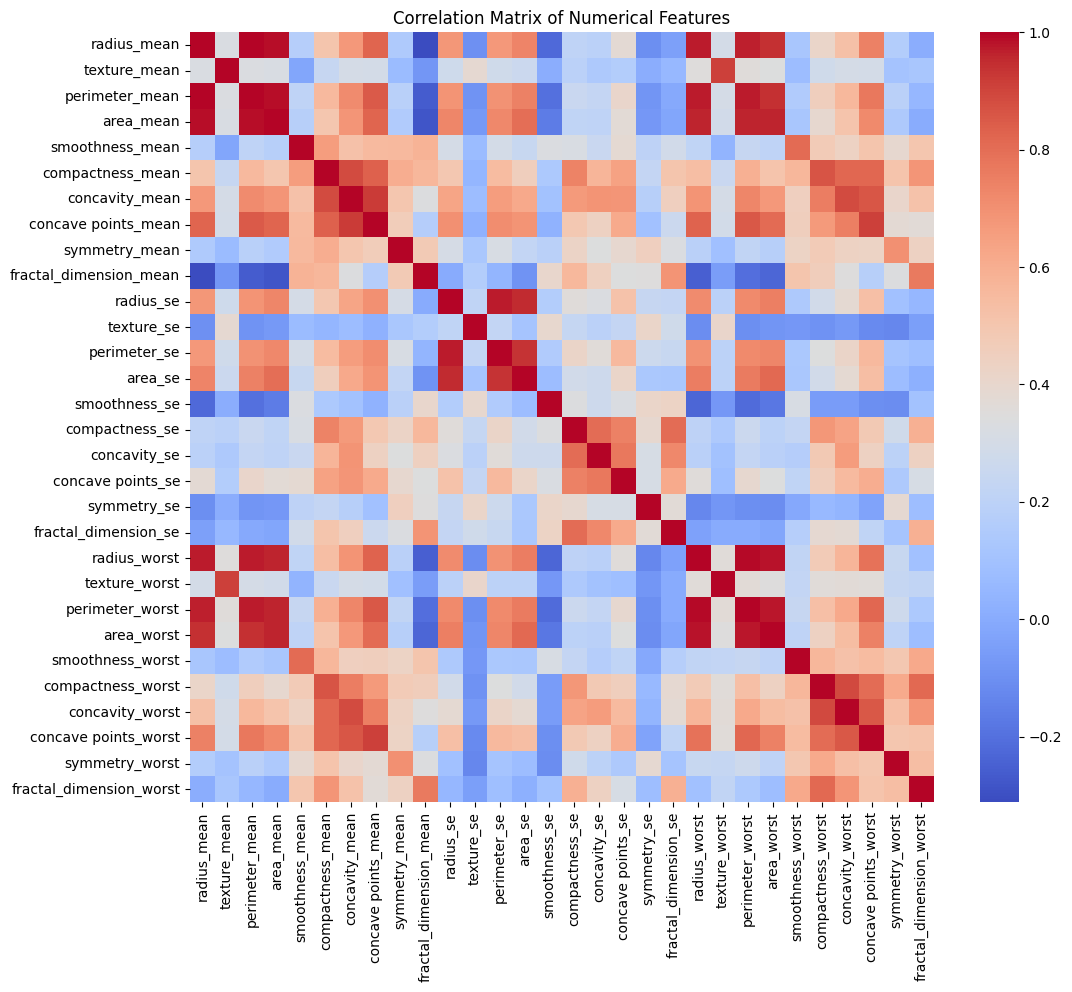

In [6]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop(['id', 'Unnamed: 32'])
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [17]:
y_pred = logreg_model.predict(X_test_scaled)
y_pred_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[71  1]
 [ 3 39]]


In [18]:
columns_to_drop = ['id', 'Unnamed: 32']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop, axis=1)
df['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 0})

missing_values_summary = df.isnull().sum()
display(missing_values_summary)

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [19]:
X = df.drop('diagnosis_encoded', axis=1)
y = df['diagnosis_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train.drop('diagnosis', axis=1))
X_train_scaled = scaler.transform(X_train.drop('diagnosis', axis=1))
X_test_scaled = scaler.transform(X_test.drop('diagnosis', axis=1))

In [21]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[71  1]
 [ 3 39]]

Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1-score: 0.9512

ROC AUC Score: 0.9960


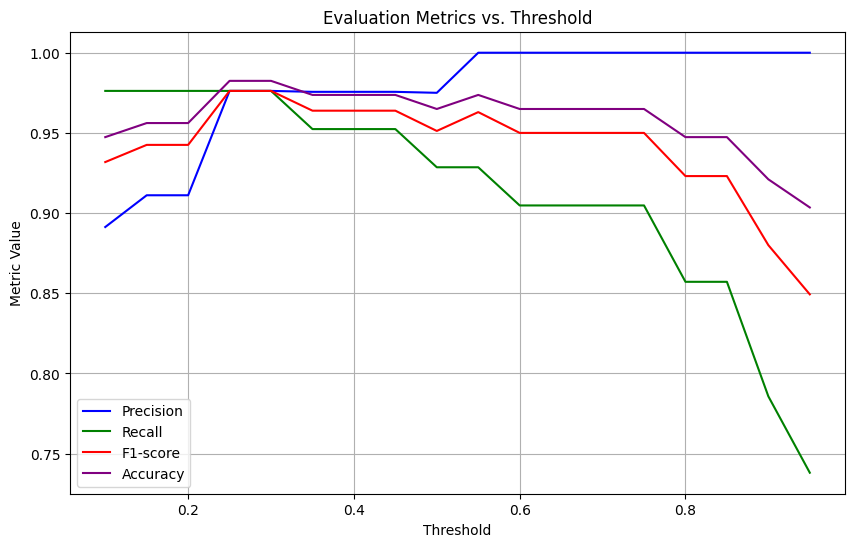

Optimal Threshold: 0.25000000000000006
Corresponding Metrics at optimal threshold:
Precision: 0.9761904761904762
Recall: 0.9761904761904762
F1-score: 0.9761904761904762
Accuracy: 0.9824561403508771


In [24]:
thresholds = np.arange(0.1, 1.0, 0.05)
precisions = []
recalls = []
f1_scores = []
accuracies = []

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1-score', color='red')
plt.plot(thresholds, accuracies, label='Accuracy', color='purple')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Corresponding Metrics at optimal threshold:")
print(f"Precision: {precisions[np.argmax(f1_scores)]}")
print(f"Recall: {recalls[np.argmax(f1_scores)]}")
print(f"F1-score: {f1_scores[np.argmax(f1_scores)]}")
print(f"Accuracy: {accuracies[np.argmax(f1_scores)]}")

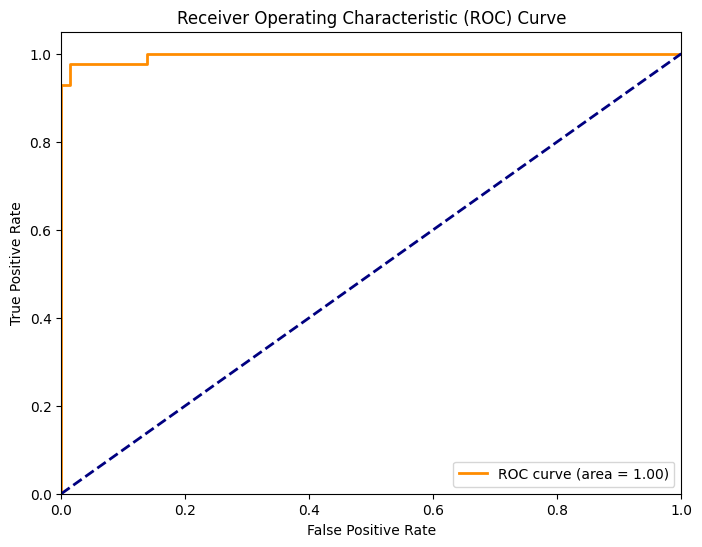

Decision boundary visualization is not possible due to the dimensionality of the dataset (more than two features).


In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Decision boundary visualization is not possible due to the dimensionality of the dataset (more than two features).")


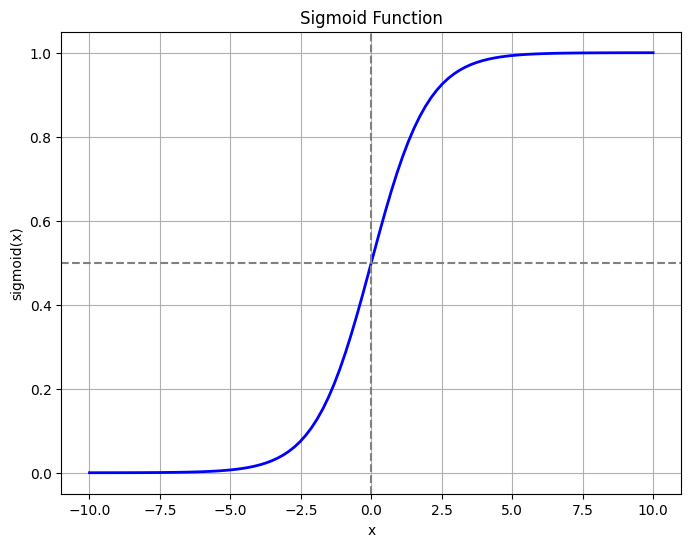

In [31]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', lw=2)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.show()

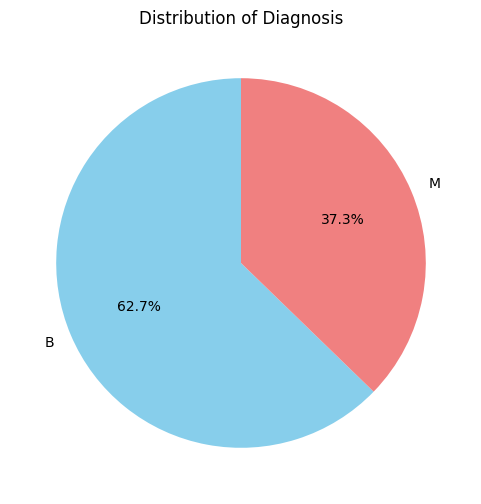

In [32]:
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Diagnosis')
plt.show()